In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
import spacy
nlp = spacy.load('ja_ginza')

In [10]:
from parse_5w1h import parse_5w1h
#テストファイル読み込み&下処理
path = "/Users/shota/Documents/itac/test_summary1.txt"
with open(path) as f:
    text = f.read()
text = text.replace('\n','')
print(text)
doc = nlp(text)

OK えっとー聞こえる。はい聞こえます。AI専用のホームページの話があったじゃん。はい。あれさあ尾崎の方でもってもらいたいの。承知しました。多分出来上がって石井さんから入れてもらってるんだけどあれおすすめらんないかな。承知しました。請求とかが今。さっさとホームページ出してほしいんじゃないのページを公開をちょっとあるお酒持ってもらっていい。色々あるから大変だったらちょっと俺に言って。承知しました。塩釜もあるしアイタムズのさっき言ったようにちょっと持ってるじゃん。じゃあITDは伊藤にさあ引き継いでいいから。承知しました。ITD伊藤に引き継いだ後でもいいんだけどでいいから AIのホームページのやつ入ってほしいからだからアイタムズ今月、5月も少しあるのかな、塩釜メインでそういう感じでいい、ちょっとお願いして。承知しました。一点だけですね、ご報告したいことがありまして。どこか明日の10時まであの日本テクト条件で作業が厳しいということを伺ったんですね。なのでもう人を入れるしかないと考えております。なるほどね。はい。日本テクトってそんな忙しいんだ。IBMのもやってるからね。なるほど。中島さんもほぼ同じ状況のようです。 かといって誰入れる。でもそうですね。　JAVAで岡島さん作ってんでしょ。言語ちょっと確認して。PHPです。で作ってるって。今じゃあできるけど忙しいから。PHPだったらでもまだ見つかるね。ちょっと俺じゃあ当たるわ。 もう一つがですねswiftで万歩計アプリってかかるれている。あっちはとさんできる。ようさん監修の元とさんって感じかな。PHPが尾崎の動きの方が好きでいいと思うんだよ。最もマルチプラットフォームだと望ましいんですよ。あーそうだな。一旦もういいよ。りょうさん空くまでIOSでとさんやってもらって、 Android の対応も最悪 Android で出てくるけど後でフラットにする。ちょっとら当たる。あのグループで今から投げるからちょっと待ってここで。今投げた。優先順位としては塩釜一番なのは変わりないから尾崎は2番目がアイタイムズで、ITD の件は3番目。ITDのやつが終わってからでいい、AIのホームページは。忘れないでね。早く会いたいですね先週だっけ石井さんから言われてるやつあごめんちょっとそれはそうだな


In [11]:
for sent in doc.sents:
    print(sent.start)
    print(sent.end)
    print(doc[sent.start:sent.end])

0
4
OK えっとー聞こえる。
4
8
はい聞こえます。
8
19
AI専用のホームページの話があったじゃん。
19
21
はい。
21
33
あれさあ尾崎の方でもってもらいたいの。
33
38
承知しました。
38
59
多分出来上がって石井さんから入れてもらってるんだけどあれおすすめらんないかな。
59
64
承知しました。
64
70
請求とかが今。
70
93
さっさとホームページ出してほしいんじゃないのページを公開をちょっとあるお酒持ってもらっていい。
93
105
色々あるから大変だったらちょっと俺に言って。
105
110
承知しました。
110
126
塩釜もあるしアイタムズのさっき言ったようにちょっと持ってるじゃん。
126
137
じゃあITDは伊藤にさあ引き継いでいいから。
137
142
承知しました。
142
195
ITD伊藤に引き継いだ後でもいいんだけどでいいから AIのホームページのやつ入ってほしいからだからアイタムズ今月、5月も少しあるのかな、塩釜メインでそういう感じでいい、ちょっとお願いして。
195
200
承知しました。
200
216
一点だけですね、ご報告したいことがありまして。
216
241
どこか明日の10時まであの日本テクト条件で作業が厳しいということを伺ったんですね。
241
256
なのでもう人を入れるしかないと考えております。
256
259
なるほどね。
259
261
はい。
261
269
日本テクトってそんな忙しいんだ。
269
277
IBMのもやってるからね。
277
279
なるほど。
279
289
中島さんもほぼ同じ状況のようです。
289
296
かといって誰入れる。
296
302
でもそうですね。
302
311
JAVAで岡島さん作ってんでしょ。
311
317
言語ちょっと確認して。
317
320
PHPです。
320
325
で作ってるって。
325
332
今じゃあできるけど忙しいから。
332
341
PHPだったらでもまだ見つかるね。
341
347
ちょっと俺じゃあ当たるわ。
347
364
もう一つがですねswiftで万歩計アプリってかかるれている。
364
370
あっちはとさんできる。
370
382
ようさん監修の元とさんって感じかな。
382
399
PHP

In [12]:
import networkx as nx

def increment_edge (graph, node0, node1):
    print("link {} {}".format(node0, node1))
    
    if graph.has_edge(node0, node1):
        graph[node0][node1]["weight"] += 1.0
    else:
        graph.add_edge(node0, node1, weight=1.0)

In [13]:
POS_KEPT = ["ADJ", "NOUN", "PROPN", "VERB"]

def link_sentence (doc, sent, lemma_graph, seen_lemma):
    visited_tokens = []
    visited_nodes = []

    for i in range(sent.start, sent.end):
        token = doc[i]

        if token.pos_ in POS_KEPT:
            key = (token.lemma_, token.pos_)

            if key not in seen_lemma:
                seen_lemma[key] = set([token.i])
            else:
                seen_lemma[key].add(token.i)

            node_id = list(seen_lemma.keys()).index(key)

            if not node_id in lemma_graph:
                lemma_graph.add_node(node_id)

            print("visit {} {}".format(visited_tokens, visited_nodes))
            print("range {}".format(list(range(len(visited_tokens) - 1, -1, -1))))
            
            for prev_token in range(len(visited_tokens) - 1, -1, -1):
                print("prev_tok {} {}".format(prev_token, (token.i - visited_tokens[prev_token])))
                
                if (token.i - visited_tokens[prev_token]) <= 3:
                    increment_edge(lemma_graph, node_id, visited_nodes[prev_token])
                else:
                    break

            print(" -- {} {} {} {} {} {}".format(token.i, token.text, token.lemma_, token.pos_, visited_tokens, visited_nodes))

            visited_tokens.append(token.i)
            visited_nodes.append(node_id)

In [14]:
lemma_graph = nx.Graph()
seen_lemma = {}

for sent in doc.sents:
    link_sentence(doc, sent, lemma_graph, seen_lemma)
    #break # only test one sentence

print(seen_lemma)

visit [] []
range []
 -- 0 OK OK NOUN [] []
visit [0] [0]
range [0]
prev_tok 0 2
link 1 0
 -- 2 聞こえる 聞こえる VERB [0] [0]
visit [] []
range []
 -- 5 聞こえ 聞こえる VERB [] []
visit [] []
range []
 -- 8 AI AI NOUN [] []
visit [8] [2]
range [0]
prev_tok 0 1
link 3 2
 -- 9 専用 専用 NOUN [8] [2]
visit [8, 9] [2, 3]
range [1, 0]
prev_tok 1 2
link 4 3
prev_tok 0 3
link 4 2
 -- 11 ホームページ ホームページ NOUN [8, 9] [2, 3]
visit [8, 9, 11] [2, 3, 4]
range [2, 1, 0]
prev_tok 2 2
link 5 4
prev_tok 1 4
 -- 13 話 話 NOUN [8, 9, 11] [2, 3, 4]
visit [8, 9, 11, 13] [2, 3, 4, 5]
range [3, 2, 1, 0]
prev_tok 3 2
link 6 5
prev_tok 2 4
 -- 15 あっ 有る VERB [8, 9, 11, 13] [2, 3, 4, 5]
visit [] []
range []
 -- 21 あれ あれ VERB [] []
visit [21] [7]
range [0]
prev_tok 0 2
link 8 7
 -- 23 尾崎 尾崎 PROPN [21] [7]
visit [21, 23] [7, 8]
range [1, 0]
prev_tok 1 2
link 9 8
prev_tok 0 4
 -- 25 方 方 NOUN [21, 23] [7, 8]
visit [21, 23, 25] [7, 8, 9]
range [2, 1, 0]
prev_tok 2 2
link 10 9
prev_tok 1 4
 -- 27 もっ 持つ VERB [21, 23, 25] [7, 8, 9]
visit [] 

In [15]:
labels = {}
keys = list(seen_lemma.keys())

for i in range(len(seen_lemma)):
    labels[i] = keys[i][0].lower()

labels


{0: 'ok',
 1: '聞こえる',
 2: 'ai',
 3: '専用',
 4: 'ホームページ',
 5: '話',
 6: '有る',
 7: 'あれ',
 8: '尾崎',
 9: '方',
 10: '持つ',
 11: '承知',
 12: '出来上がる',
 13: '石井',
 14: 'さん',
 15: '入れる',
 16: '御',
 17: 'すすめる',
 18: '請求',
 19: '今',
 20: '出す',
 21: 'ページ',
 22: '公開',
 23: '酒',
 24: '良い',
 25: '大変',
 26: '言う',
 27: '塩竈',
 28: 'アイタムズ',
 29: 'itd',
 30: '伊藤',
 31: '引き継ぐ',
 32: '後',
 33: '奴',
 34: '入る',
 35: '月',
 36: '塩釜',
 37: 'メイン',
 38: '感じ',
 39: '願う',
 40: '点',
 41: '報告',
 42: 'こと',
 43: '明日',
 44: '時',
 45: '日本',
 46: 'テクト',
 47: '条件',
 48: '作業',
 49: '厳しい',
 50: '伺う',
 51: '人',
 52: '考える',
 53: '忙しい',
 54: 'ibm',
 55: '遣る',
 56: '中島',
 57: '同じ',
 58: '状況',
 59: '様',
 60: 'java',
 61: '岡島',
 62: '作る',
 63: '言語',
 64: '確認',
 65: 'php',
 66: '出来る',
 67: '見付かる',
 68: '当たる',
 69: 'つ',
 70: 'swift',
 71: '万歩',
 72: '計',
 73: 'アプリ',
 74: '掛かる',
 75: 'よう',
 76: '監修',
 77: '元',
 78: '動き',
 79: '好き',
 80: '思う',
 81: 'マルチ',
 82: 'プラットフォーム',
 83: '望ましい',
 84: 'りょう',
 85: '空く',
 86: 'ios',
 87: 'アンドロイド',
 88: 

In [16]:
import matplotlib as mpl
print(mpl.rcParams['font.family'])

['sans-serif']


{0: Text(-0.1890830412402981, -0.8295332875848271, 'ok'),
 1: Text(-0.2206173510680433, -0.8286906075705611, '聞こえる'),
 2: Text(0.23852752723391432, -0.21945416044206245, 'ai'),
 3: Text(0.20643697857321167, -0.255088272951491, '専用'),
 4: Text(0.17091613572393277, -0.21607828883476984, 'ホームページ'),
 5: Text(0.09469210114861977, -0.2572786955570526, '話'),
 6: Text(0.01586052026066579, -0.24570974734758716, '有る'),
 7: Text(0.4612342815905886, -0.3001520070112183, 'あれ'),
 8: Text(0.3913553674141267, -0.31650686475565487, '尾崎'),
 9: Text(0.2716818125652101, -0.25508444612019165, '方'),
 10: Text(0.10577963090071939, -0.22201517041037025, '持つ'),
 11: Text(-0.9999999999999999, 0.09203804558893658, '承知'),
 12: Text(-0.03495426163621309, 0.16043786287344455, '出来上がる'),
 13: Text(-0.039595464628173836, 0.1169378763003959, '石井'),
 14: Text(-0.07413078659817252, 0.18207241271517505, 'さん'),
 15: Text(-0.03482034287237016, 0.09235507601608135, '入れる'),
 16: Text(-0.0072106939731797735, -0.155261212586439

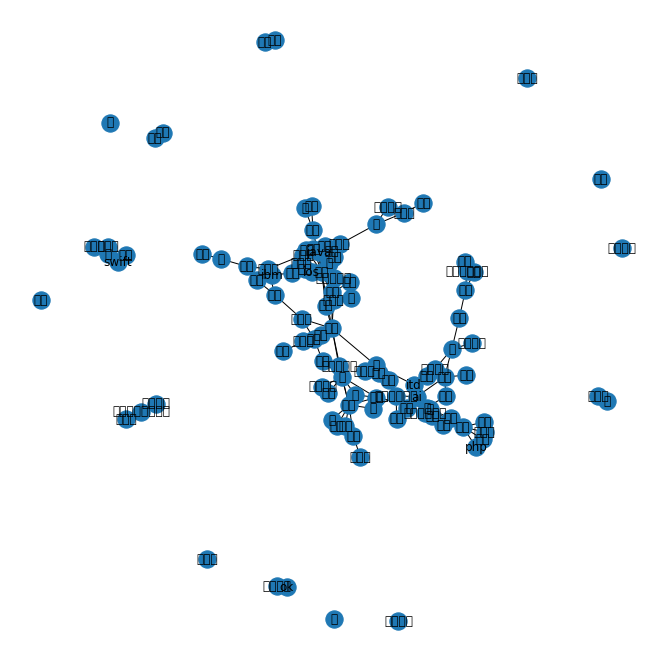

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 9))
pos = nx.spring_layout(lemma_graph)

nx.draw(lemma_graph, pos=pos, with_labels=False, font_weight="bold")
nx.draw_networkx_labels(lemma_graph, pos, labels)

In [18]:
ranks = nx.pagerank(lemma_graph)
ranks

{0: 0.009689922480620155,
 1: 0.009689922480620155,
 2: 0.017437326137767717,
 3: 0.006368392572387582,
 4: 0.023008251014265558,
 5: 0.006658459187223049,
 6: 0.029226478070132535,
 7: 0.004347388249176928,
 8: 0.023831927119788515,
 9: 0.012828376584842687,
 10: 0.012188248910969736,
 11: 0.0014534883720930235,
 12: 0.0060127354572295025,
 13: 0.01637038746691872,
 14: 0.05534421190891474,
 15: 0.011554439768759982,
 16: 0.021308961873982585,
 17: 0.0040409955968624045,
 18: 0.0014534883720930235,
 19: 0.01297114423609712,
 20: 0.003898127121527273,
 21: 0.00507918387440208,
 22: 0.008531247090363504,
 23: 0.009391328836946659,
 24: 0.015342056992595013,
 25: 0.004213820437788799,
 26: 0.03394131450475488,
 27: 0.004213820437788799,
 28: 0.006433060219674563,
 29: 0.016584333074044333,
 30: 0.0108294697063255,
 31: 0.013756216183237652,
 32: 0.01290641372145666,
 33: 0.018018808011087593,
 34: 0.00645078118045385,
 35: 0.004213820437788799,
 36: 0.004719181473505785,
 37: 0.007684035

In [19]:
imp_list = []
for node_id, rank in sorted(ranks.items(), key=lambda x: x[1], reverse=True):
    print(node_id, rank, labels[node_id])
    imp_list.append(labels[node_id])

14 0.05534421190891474 さん
26 0.03394131450475488 言う
6 0.029226478070132535 有る
8 0.023831927119788515 尾崎
4 0.023008251014265558 ホームページ
16 0.021308961873982585 御
33 0.018018808011087593 奴
2 0.017437326137767717 ai
29 0.016584333074044333 itd
13 0.01637038746691872 石井
24 0.015342056992595013 良い
46 0.015086119539154532 テクト
82 0.014120582052631381 プラットフォーム
31 0.013756216183237652 引き継ぐ
72 0.013423688230927548 計
19 0.01297114423609712 今
32 0.01290641372145666 後
45 0.012829499073367561 日本
9 0.012828376584842687 方
10 0.012188248910969736 持つ
87 0.012048361272519039 アンドロイド
15 0.011554439768759982 入れる
42 0.011492007221118348 こと
30 0.0108294697063255 伊藤
66 0.010319580002400958 出来る
71 0.010291122050585636 万歩
73 0.010291122050585636 アプリ
57 0.010052651617740351 同じ
100 0.009984501761377006 番目
95 0.00996437837545652 投げる
0 0.009689922480620155 ok
1 0.009689922480620155 聞こえる
63 0.009689922480620155 言語
64 0.009689922480620155 確認
68 0.009689922480620155 当たる
93 0.009689922480620155 等
106 0.009689922480620155

In [20]:
import math
def collect_phrases (chunk, phrases, counts):
    chunk_len = chunk.end - chunk.start + 1
    sq_sum_rank = 0.0
    non_lemma = 0
    compound_key = set([])

    for i in range(chunk.start, chunk.end):
        token = doc[i]
        key = (token.lemma_, token.pos_)
        
        if key in seen_lemma:
            node_id = list(seen_lemma.keys()).index(key)
            rank = ranks[node_id]
            sq_sum_rank += rank
            compound_key.add(key)
        
            print(" {} {} {} {}".format(token.lemma_, token.pos_, node_id, rank))
        else:
            non_lemma += 1
    
    # although the noun chunking is greedy, we discount the ranks using a
    # point estimate based on the number of non-lemma tokens within a phrase
    non_lemma_discount = chunk_len / (chunk_len + (2.0 * non_lemma) + 1.0)

    # use root mean square (RMS) to normalize the contributions of all the tokens
    phrase_rank = math.sqrt(sq_sum_rank / (chunk_len + non_lemma))
    phrase_rank *= non_lemma_discount

    # remove spurious punctuation
    phrase = chunk.text.lower().replace("'", "")

    # create a unique key for the the phrase based on its lemma components
    compound_key = tuple(sorted(list(compound_key)))
    
    if not compound_key in phrases:
        phrases[compound_key] = set([ (phrase, phrase_rank) ])
        counts[compound_key] = 1
    else:
        phrases[compound_key].add( (phrase, phrase_rank) )
        counts[compound_key] += 1

    print("{} {} {} {} {} {}".format(phrase_rank, chunk.text, chunk.start, chunk.end, chunk_len, counts[compound_key]))

In [33]:
phrases = {}
counts = {}

for chunk in doc.noun_chunks:
    collect_phrases(chunk, phrases, counts)



 OK NOUN 0 0.009689922480620155
0.04640383719914204 OK 0 1 2 1
 AI NOUN 2 0.017437326137767717
 専用 NOUN 3 0.006368392572387582
0.06680997124796656 AI専用 8 10 3 1
 ホームページ NOUN 4 0.023008251014265558
0.07150485766601308 ホームページ 11 12 2 1
 話 NOUN 5 0.006658459187223049
0.03846631769692385 話 13 14 2 1
 尾崎 PROPN 8 0.023831927119788515
0.07277351032070287 尾崎 23 24 2 1
 方 NOUN 9 0.012828376584842687
0.05339241848977497 方 25 26 2 1
 石井 PROPN 13 0.01637038746691872
 さん NOUN 14 0.05534421190891474
0.11595899009119033 石井さん 41 43 3 1
 御 NOUN 16 0.021308961873982585
0.036493973709695024 あれお 51 53 3 1
 請求 NOUN 18 0.0014534883720930235
0.017972128867239735 請求 64 65 2 1
 今 NOUN 19 0.01297114423609712
0.053688699899610816 今 68 69 2 1
 ホームページ NOUN 4 0.023008251014265558
0.07150485766601308 ホームページ 71 72 2 2
 ページ NOUN 21 0.00507918387440208
0.033596242760834234 ページ 79 80 2 1
 公開 NOUN 22 0.008531247090363504
0.04354116083371509 公開 81 82 2 1
 御 NOUN 16 0.021308961873982585
 酒 NOUN 23 0.009391328836946659
0.07

In [26]:
import math
def collect_5w1hphrases (chunk,chunk_start,chunk_end, phrases, counts):
    chunk_len = chunk_end - chunk_start + 1
    sq_sum_rank = 0.0
    non_lemma = 0
    compound_key = set([])

    for i in range(chunk_start, chunk_end):
        token = doc[i]
        key = (token.lemma_, token.pos_)
        
        if key in seen_lemma:
            node_id = list(seen_lemma.keys()).index(key)
            rank = ranks[node_id]
            sq_sum_rank += rank
            compound_key.add(key)
        
            print(" {} {} {} {}".format(token.lemma_, token.pos_, node_id, rank))
        else:
            non_lemma += 1
    
    # although the noun chunking is greedy, we discount the ranks using a
    # point estimate based on the number of non-lemma tokens within a phrase
    non_lemma_discount = chunk_len / (chunk_len + (2.0 * non_lemma) + 1.0)

    # use root mean square (RMS) to normalize the contributions of all the tokens
    phrase_rank = math.sqrt(sq_sum_rank / (chunk_len + non_lemma))
    phrase_rank *= non_lemma_discount

    # remove spurious punctuation
    phrase = chunk.replace("'", "")

    # create a unique key for the the phrase based on its lemma components
    compound_key = tuple(sorted(list(compound_key)))
    
    if not compound_key in phrases:
        phrases[compound_key] = set([ (phrase, phrase_rank) ])
        counts[compound_key] = 1
    else:
        phrases[compound_key].add( (phrase, phrase_rank) )
        counts[compound_key] += 1

    print("{} {} {} {} {} {}".format(phrase_rank, chunk, chunk_start, chunk_end, chunk_len, counts[compound_key]))

In [27]:
from parse_5w1h import parse_5w1h
parse = parse_5w1h(0)
parse.extract(text)


In [28]:
parse.display_5w1h()

OKえっとー聞こえる。
How


はい聞こえます。
How


AI専用のホームページの話が
Who


あったじゃん。
How


はい。
None


あれさあ尾崎の方でもってもらいたいの。
How


承知しました。
How


多分出来上がって石井さんから入れてもらってるんだけどあれおすすめらんないかな。
How


承知しました。
How


請求
None


とかが今。
When


さっさとホームページ出してほしいんじゃないのページを公開を
What


ちょっとあるお酒持ってもらっていい。
How


色々あるから大変だったらちょっと俺に言って。
How


承知しました。
How


塩釜も
Who


あるしアイタムズのさっき言ったようにちょっと持ってるじゃん。
How


じゃあ
None


ITDは
Who


伊藤にさあ引き継いでいいから。
How


承知しました。
How


ITD伊藤に引き継いだ後でもいいんだけどでいいから
How


AIのホームページのやつ入ってほしいからだから
Why


アイタムズ今月、5月も
When


少しあるのかな、塩釜メインでそういう感じでいい、ちょっとお願いして。
How


承知しました。
How


一点だけですね、ご報告したいことがありまして。
How


どこか明日の10時まで
When


あの日本
Where


テクト条件で作業が
Who


厳しいという
How


ことを
What


伺ったんですね。
How


なので
Why


もう人を
What


入れるしかないと考えております。
How


なるほどね。
None


はい。
None


日本
Where


テクトって
Who


そんな忙しいんだ。
How


IBMのもやってるからね。
How


なるほど。
None


中島さんも
Who


ほぼ同じ状況のようです。
How


かといって誰入れる。
How


でもそうですね。
None


JAVAで岡島さん作ってんでしょ。
How


言語ちょっと確認して。
How


PHPです。
How


で作ってるって。
How


今じゃあ
When


できるけど忙しいから。
How


PHPだったらでもまだ見つかるね。
How


ちょっと俺

In [39]:
phrases = {}
counts = {}

for i,chunk in enumerate(parse._5w1hs):
    collect_5w1hphrases(chunk, parse._5w1h_s[i],parse._5w1h_e[i],phrases, counts)

 OK NOUN 0 0.009689922480620155
 聞こえる VERB 1 0.009689922480620155
0.03557558893512516 OKえっとー聞こえる。 0 3 4 1
 聞こえる VERB 1 0.009689922480620155
0.017860845265570816 はい聞こえます。 4 7 4 1
 AI NOUN 2 0.017437326137767717
 専用 NOUN 3 0.006368392572387582
 ホームページ NOUN 4 0.023008251014265558
 話 NOUN 5 0.006658459187223049
0.04496353989923933 AI専用のホームページの話が 8 14 7 1
 有る VERB 6 0.029226478070132535
0.03101916469604843 あったじゃん。 15 18 4 1
0.0 はい。 19 20 2 1
 あれ VERB 7 0.004347388249176928
 尾崎 PROPN 8 0.023831927119788515
 方 NOUN 9 0.012828376584842687
 持つ VERB 10 0.012188248910969736
0.023516892216380522 あれさあ尾崎の方でもってもらいたいの。 21 32 12 1
 承知 VERB 11 0.0014534883720930235
0.005616290271012419 承知しました。 33 37 5 1
 出来上がる VERB 12 0.0060127354572295025
 石井 PROPN 13 0.01637038746691872
 さん NOUN 14 0.05534421190891474
 入れる VERB 15 0.011554439768759982
 御 NOUN 16 0.021308961873982585
 すすめる VERB 17 0.0040409955968624045
0.024036304409085985 多分出来上がって石井さんから入れてもらってるんだけどあれおすすめらんないかな。 38 58 21 1
 承知 VERB 11 0.001453488372093

In [43]:
phrases = {}
counts = {}
for sent in doc.sents:
    collect_phrases(sent, phrases, counts)

 OK NOUN 0 0.009689922480620155
 聞こえる VERB 1 0.009689922480620155
0.026308502808869545 OK えっとー聞こえる。 0 4 5 1
 聞こえる VERB 1 0.009689922480620155
0.014501199124731887 はい聞こえます。 4 8 5 1
 AI NOUN 2 0.017437326137767717
 専用 NOUN 3 0.006368392572387582
 ホームページ NOUN 4 0.023008251014265558
 話 NOUN 5 0.006658459187223049
 有る VERB 6 0.029226478070132535
0.03253530404601651 AI専用のホームページの話があったじゃん。 8 19 12 1
0.0 はい。 19 21 3 1
 あれ VERB 7 0.004347388249176928
 尾崎 PROPN 8 0.023831927119788515
 方 NOUN 9 0.012828376584842687
 持つ VERB 10 0.012188248910969736
0.02180980072656946 あれさあ尾崎の方でもってもらいたいの。 21 33 13 1
 承知 VERB 11 0.0014534883720930235
0.004822428221704122 承知しました。 33 38 6 1
 出来上がる VERB 12 0.0060127354572295025
 石井 PROPN 13 0.01637038746691872
 さん NOUN 14 0.05534421190891474
 入れる VERB 15 0.011554439768759982
 御 NOUN 16 0.021308961873982585
 すすめる VERB 17 0.0040409955968624045
0.023104595867454798 多分出来上がって石井さんから入れてもらってるんだけどあれおすすめらんないかな。 38 59 22 1
 承知 VERB 11 0.0014534883720930235
0.004822428221704122 承知し

In [45]:
import operator

min_phrases = {}

for compound_key, rank_tuples in phrases.items():
    l = list(rank_tuples)
    l.sort(key=operator.itemgetter(1), reverse=True)
    
    phrase, rank = l[0]
    count = counts[compound_key]
    
    min_phrases[phrase] = (rank, count)

In [46]:
for phrase, (rank, count) in sorted(min_phrases.items(), key=lambda x: x[1][0], reverse=True):
    print(phrase)

ようさん監修の元とさんって感じかな。
中島さんもほぼ同じ状況のようです。
javaで岡島さん作ってんでしょ。
あっちはとさんできる。
りょうさん空くまでiosでとさんやってもらって、 android の対応も最悪 android で出てくるけど後でフラットにする。
ai専用のホームページの話があったじゃん。
早く会いたいですね先週だっけ石井さんから言われてるやつあごめんちょっとそれはそうだな
itd伊藤に引き継いだ後でもいいんだけどでいいから aiのホームページのやつ入ってほしいからだからアイタムズ今月、5月も少しあるのかな、塩釜メインでそういう感じでいい、ちょっとお願いして。
itdのやつが終わってからでいい、aiのホームページは。
ok えっとー聞こえる。
ちょっとら当たる。
さっさとホームページ出してほしいんじゃないのページを公開をちょっとあるお酒持ってもらっていい。
かといって誰入れる。
どこか明日の10時まであの日本テクト条件で作業が厳しいということを伺ったんですね。
じゃあitdは伊藤にさあ引き継いでいいから。
phpが尾崎の動きの方が好きでいいと思うんだよ。
今じゃあできるけど忙しいから。
塩釜もあるしアイタムズのさっき言ったようにちょっと持ってるじゃん。
多分出来上がって石井さんから入れてもらってるんだけどあれおすすめらんないかな。
色々あるから大変だったらちょっと俺に言って。
日本テクトってそんな忙しいんだ。
あれさあ尾崎の方でもってもらいたいの。
優先順位としては塩釜一番なのは変わりないから尾崎は2番目がアイタイムズで、itd の件は3番目。
言語ちょっと確認して。
もう一つがですねswiftで万歩計アプリってかかるれている。
最もマルチプラットフォームだと望ましいんですよ。
あのグループで今から投げるからちょっと待ってここで。
請求とかが今。
一旦もういいよ。
一点だけですね、ご報告したいことがありまして。
今投げた。
はい聞こえます。
phpです。
ibmのもやってるからね。
ちょっと俺じゃあ当たるわ。
で作ってるって。
なのでもう人を入れるしかないと考えております。
phpだったらでもまだ見つかるね。
承知しました。
忘れないでね。
はい。


In [32]:
for node_id, rank in sorted(ranks.items(), key=lambda x: x[1], reverse=True):
    print(labels[node_id], rank)

さん 0.05534421190891474
言う 0.03394131450475488
有る 0.029226478070132535
尾崎 0.023831927119788515
ホームページ 0.023008251014265558
御 0.021308961873982585
奴 0.018018808011087593
ai 0.017437326137767717
itd 0.016584333074044333
石井 0.01637038746691872
良い 0.015342056992595013
テクト 0.015086119539154532
プラットフォーム 0.014120582052631381
引き継ぐ 0.013756216183237652
計 0.013423688230927548
今 0.01297114423609712
後 0.01290641372145666
日本 0.012829499073367561
方 0.012828376584842687
持つ 0.012188248910969736
アンドロイド 0.012048361272519039
入れる 0.011554439768759982
こと 0.011492007221118348
伊藤 0.0108294697063255
出来る 0.010319580002400958
万歩 0.010291122050585636
アプリ 0.010291122050585636
同じ 0.010052651617740351
番目 0.009984501761377006
投げる 0.00996437837545652
ok 0.009689922480620155
聞こえる 0.009689922480620155
言語 0.009689922480620155
確認 0.009689922480620155
当たる 0.009689922480620155
等 0.009689922480620155
早い 0.009689922480620155
会う 0.009689922480620155
出る 0.009601679315352121
酒 0.009391328836946659
最悪 0.009347241306702461
条件 0.00